In [16]:
import sys

sys.path = ['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug',
            '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev',
            '/opt/anaconda3/envs/network_modularity/lib/python39.zip',
            '/opt/anaconda3/envs/network_modularity/lib/python3.9',
            '/opt/anaconda3/envs/network_modularity/lib/python3.9/lib-dynload', '',
            '/opt/anaconda3/envs/network_modularity/lib/python3.9/site-packages', '../',
            '/Users/noamazmon/PycharmProjects/network_modularity/main', ]
print(sys.path)

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/opt/anaconda3/envs/network_modularity/lib/python39.zip', '/opt/anaconda3/envs/network_modularity/lib/python3.9', '/opt/anaconda3/envs/network_modularity/lib/python3.9/lib-dynload', '', '/opt/anaconda3/envs/network_modularity/lib/python3.9/site-packages', '../', '/Users/noamazmon/PycharmProjects/network_modularity/main']


In [71]:


import matplotlib.pyplot as plt
import numpy as np

from find_feature_spectrum.find_feature_dist_utils import get_selected_feature_names
from find_feature_spectrum.samples_from_dist import SampleGaussian
from logical_gates import LogicalGates
from parameters.retina.retina_by_dim import RetinaByDim

COLORS = ['#4F6272', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]


In [18]:
num_features = 6
base_path = "/Volumes/noamaz/modularity"
folder_path = "retina_xor/retina_3_layers_3_4"
train_test_folder_name = 'train_test_data'
train_test_dir = f"{base_path}/{folder_path}/{train_test_folder_name}"
lgb_dir = f"{base_path}/{folder_path}/lightgbm_feature_selection"
if num_features == 6:
    exp_name = 'exp_2023-09-11-09-59-56'
    connectivity_pkl_path = f"{train_test_dir}/retina_xor_2023-09-11-09-59-56_all_train_test_connectivity_data"
    samples_path = f"{train_test_dir}/retina_xor_2023-09-11-09-59-56_all_train_test_masked_data_6_features.pkl"
    used_features_csv_path = f"{lgb_dir}/{exp_name}/2023-09-11-09-59-56_1_70_used_features.csv"
else:
    raise ValueError
dims = [6, 3, 4, 2]
num_layers = len(dims) - 1
task_params = RetinaByDim(
    start_dimensions=dims,
    num_layers=num_layers,
    by_epochs=False,
    task_base_folder_name='retina_xor',
    rule=LogicalGates.XOR,
)

sampler = SampleGaussian(
    num_features=num_features,
    samples_path=samples_path,
    num_samples=1,
)

selected_feature_names = get_selected_feature_names(
    used_features_csv_name=used_features_csv_path,
    num_features=num_features
).to_list()

In [78]:
points = [
    [
        2.14968926, 10, 10.03, 10.03, 10.03, 91
    ],
    [
        1.96172632, 7, 7, 7, 7, 20,
    ],
    [
        2.0351528, 8, 9.98, 8.02, 8, 28,
    ],
    [
        2.09960146, 6, 6, 7.98, 9, 41,
    ],
    [
        2.09491389, 9.98, 9.96, 9, 9.98, 56,
    ]
]

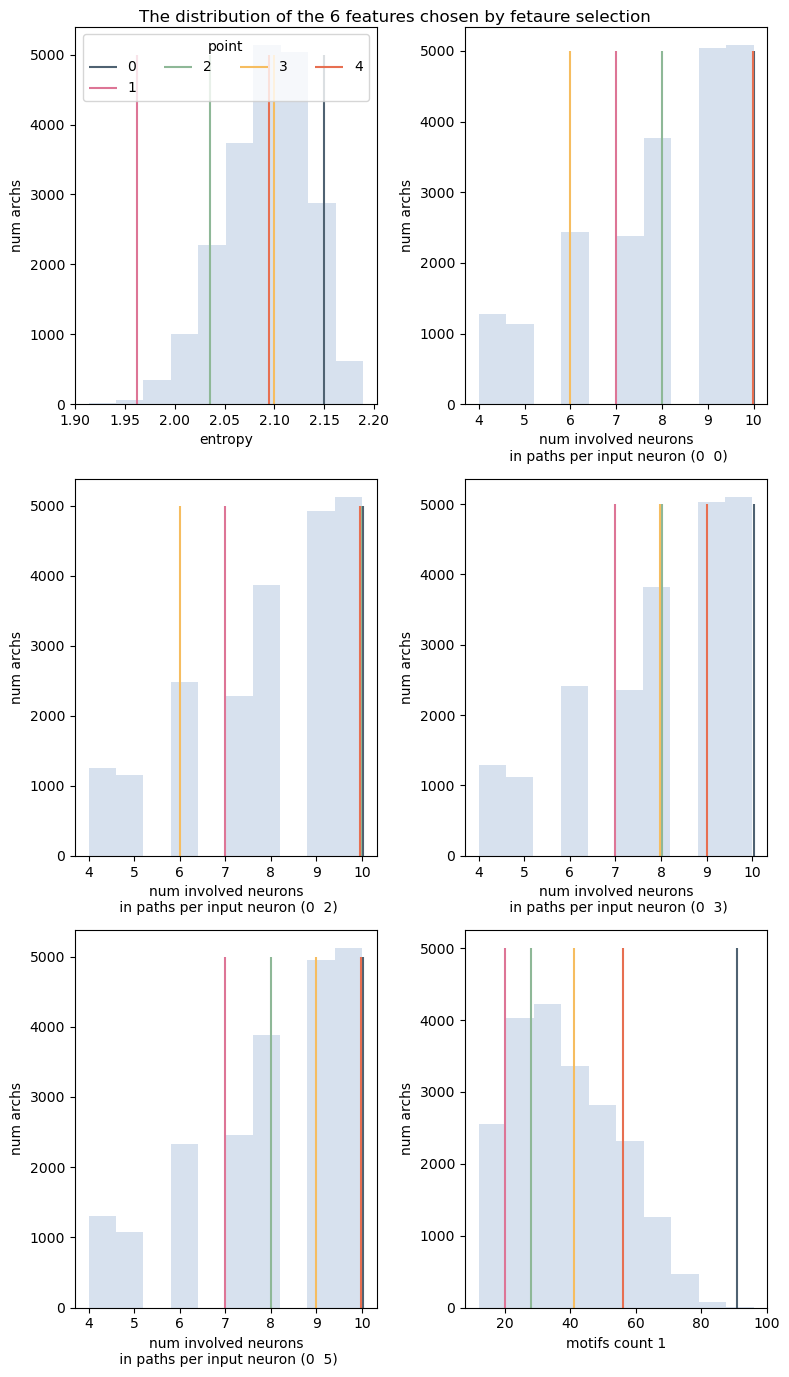

In [79]:

num_columns = int(np.ceil(len(selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(8, 14), )
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (f_name, (i, j)) in enumerate(zip(selected_feature_names, idxs)):
    axs[i, j].hist(sampler.find_feature_dist.samples_to_model[k], color="#d7e1ee", )
    for ind, p in enumerate(points):
        axs[i, j].vlines(p[k], 0, 5000, colors=COLORS[ind], label=ind)
    if len(f_name) > 40:
        name = f"{f_name.replace('_', ' ')[:20]}\n{f_name.replace('_', ' ')[20:]}"
    else:
        name = f"{f_name.replace('_', ' ')}"
    #axs[i, j].set_title(f"{name}", wrap=True)
    axs[i, j].set_xlabel(f"{name}")
    axs[i, j].set_ylabel(f"num archs")

    # Put a legend to the right of the current axis
axs[0, 0].legend(loc='upper center', ncol=4, fancybox=True, title='point')

plt.suptitle('The distribution of the 6 features chosen by fetaure selection')
plt.tight_layout()